In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("../datasets/melb_data.csv")
df[df.isnull().any(axis=1)].iloc[-5:,14:17]

,BuildingArea,YearBuilt,CouncilArea
13575,NaN,1981.0,NaN
13576,133.0,1995.0,NaN
13577,NaN,1997.0,NaN
13578,157.0,1920.0,NaN
13579,112.0,1920.0,NaN


## Pandas
Pandas is a Data Manipulaiton Library hat makes it easy to handle complex datasets.

Creating a DataFrame by passing a NumPy array, with labeled columns:

In [4]:
df = pd.DataFrame(np.random.randn(6, 4),  columns=list("ABCD"))

The columns of the resulting DataFrame have different dtypes.

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:



In [5]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing data
df.head()
df.tail(3)
df.describe()
df.sort_values(by="B")
df.sort_index(axis=1, ascending=False)

## Selecting Data

In [6]:
print(df["A"])

print(df.iloc[3:5, 0:2] )#selection by index

0    0.793572
1   -1.055325
2    0.473101
3    0.265533
4   -0.240108
5   -0.676766
Name: A, dtype: float64
          A         B
3  0.265533  0.552646
4 -0.240108  1.702848


## Boolean indexing

In [7]:
print(df[df > 0])
df[df["A"] > 0]


          A         B         C         D
0  0.793572       NaN  0.968678       NaN
1       NaN       NaN  1.986096       NaN
2  0.473101  1.513316  1.402000       NaN
3  0.265533  0.552646  0.198097  0.744350
4       NaN  1.702848  1.840285  0.610273
5       NaN       NaN  0.508958       NaN


,A,B,C,D
0,0.793572,-0.229825,0.968678,-1.649430
2,0.473101,1.513316,1.402000,-0.380671
3,0.265533,0.552646,0.198097,0.744350


In [8]:
df.iloc[1,1] = "Hello"

df[df.isin(["Hello", "World"])]

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,Hello,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Task1: Missing data
In the following Dataframe, some data is missing. Find a way to:
* 1: Remove the column containing the missing data
* 2:  Fill the missing column with the average of each row

In [29]:
df1 = df.reindex( columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2000-01-01,-0.968675,0.484386,0.062507,-0.525718,NaN
2000-01-02,0.129713,1.895718,1.555978,-0.239140,NaN
2000-01-03,1.557493,1.986169,0.811139,-2.229692,NaN
2000-01-04,0.323370,1.264527,0.800800,-1.603788,NaN
2000-01-05,2.328486,1.712895,-0.129095,-1.298232,NaN
...,...,...,...,...,...
2002-09-22,-26.685280,3.474284,-27.898531,39.074424,NaN
2002-09-23,-27.440330,5.230518,-28.505705,38.851397,NaN
2002-09-24,-28.178599,3.772772,-27.713360,39.307957,NaN
2002-09-25,-27.380401,4.563130,-27.799221,38.649846,NaN


In [55]:
# df1.dropna(axis='columns')
# df1.fillna(value=5)
# pd.isna(df1)
df1.iloc[:,4]=df1.mean(axis=1)
df1

,A,B,C,D,E
2000-01-01,-0.968675,0.484386,0.062507,-0.525718,-0.236875
2000-01-02,0.129713,1.895718,1.555978,-0.239140,0.835567
2000-01-03,1.557493,1.986169,0.811139,-2.229692,0.531277
2000-01-04,0.323370,1.264527,0.800800,-1.603788,0.196227
2000-01-05,2.328486,1.712895,-0.129095,-1.298232,0.653514
...,...,...,...,...,...
2002-09-22,-26.685280,3.474284,-27.898531,39.074424,-3.008776
2002-09-23,-27.440330,5.230518,-28.505705,38.851397,-2.966030
2002-09-24,-28.178599,3.772772,-27.713360,39.307957,-3.202808
2002-09-25,-27.380401,4.563130,-27.799221,38.649846,-2.991661


# Task 2.1: Plotting

The variable *ts* below contains a randomly generated "time series" a dataset in which time is one of the axies.

* Calculate the **cumulative sum** of this series in a new series. The cumulative sum at index *i* is the sum of all entries in *ts* up until index *i*.
* Plot the cumulative sum using *matplotlib*

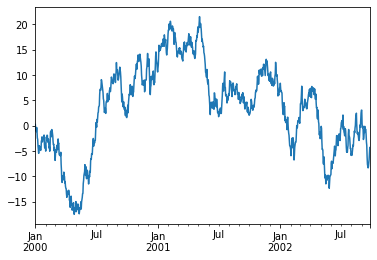

In [27]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

# Task 2.2:  

Adapt the code above to plot 4 timeseries in the same plot, with A different colour and label for each timeseries.\
The output should look similar to this:\
![ ](..\img\output_2_2.png)

<Figure size 432x288 with 0 Axes>

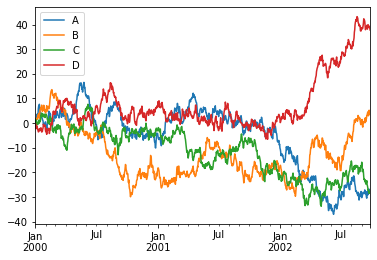

In [28]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');